In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Leads.csv")
df. head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
df.shape

(9240, 37)

In [6]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Exploring the Data
<hr/>

The dataframe has 9240 records with 37 features. We will first look into the percentages of errors or NANs in each of the features, then try to correct these imperfections either by dropping or imputing values. Let's get into this.

In [7]:
feature_list = df.columns.to_list() # creating a list of features that might come in handy later on in the process

In [8]:
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [9]:
(df[feature_list].isnull().sum()/len(df))*100 # calculating the percentages of nan values per column

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
# making a list of features that have 25 percent or more empty values
features_greater_than_25 = []
for feature in feature_list:    
    if ((df[feature].isnull().sum()/len(df))*100) >=25:
        features_greater_than_25.append(feature)

In [11]:
features_greater_than_25

['Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

### Exploring all features with more than 25 percent null values to better understand them

In [12]:
df25 = df[features_greater_than_25]

In [13]:
df25.head()

,Country,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score
0,NaN,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,Select,02.Medium,02.Medium,15.0,15.0
1,India,Unemployed,Better Career Prospects,Ringing,NaN,Select,02.Medium,02.Medium,15.0,15.0
2,India,Student,Better Career Prospects,Will revert after reading the email,Might be,Potential Lead,02.Medium,01.High,14.0,20.0
3,India,Unemployed,Better Career Prospects,Ringing,Not Sure,Select,02.Medium,01.High,13.0,17.0
4,India,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,Select,02.Medium,01.High,15.0,18.0


In [14]:
for feature in features_greater_than_25:
    print(df25[feature].value_counts())
    print("Null Percentage : ", (df25[feature].isnull().sum()/len(df))*100)
    print("Null Count : ", df25[feature].isnull().sum())
    print('-'*50)

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

#### For this case study, I am going to drop features with more than 40 percent null values.

In [15]:
# creating a list of features with 40 percent or more null values
features_greater_than_40 = []
for feature in feature_list:    
    if ((df[feature].isnull().sum()/len(df))*100) >=40:
        features_greater_than_40.append(feature)

In [16]:
features_greater_than_40

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [17]:
# dropping these features
df = df.drop(features_greater_than_40, axis=1)

In [18]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [19]:
feature_list = df.columns.to_list()
null_features = []
for feature in feature_list:    
    if ((df[feature].isnull().sum()/len(df))*100) >0:
        null_features.append(feature)
null_features

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Profile',
 'City']

In [20]:
# exploring each feature individually to handle null values
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [21]:
df['Lead Source'] = df['Lead Source'].fillna('Unknown')

In [22]:
df['Lead Source'].isnull().sum()

0

In [23]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Unknown                36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [24]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [25]:
df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [26]:
df.TotalVisits.median()

3.0

In [27]:
# imputing the null values with the median since mean is a float number which won't make sense for the number of visits
df['TotalVisits'] = df['TotalVisits'].fillna(df.TotalVisits.median())

In [28]:
df['TotalVisits'].describe() # imputing the median has not changed the mean and the std by much

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [29]:
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [30]:
# I am going to use mean to impute the missing values in Page_views_per_visit
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mean())

In [31]:
df['Page Views Per Visit'].describe()

count    9240.000000
mean        2.362820
std         2.145333
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [32]:
null_features

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Profile',
 'City']

In [33]:
print(df['Last Activity'].value_counts())
print(df['Last Activity'].isnull().sum())

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64
103


In [34]:
df['Last Activity'] = df['Last Activity'].fillna('Unknown')

In [35]:
print(df['Last Activity'].value_counts())
print(df['Last Activity'].isnull().sum())

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64
0


In [36]:
print(df['Country'].value_counts())
print(df['Country'].isnull().sum())

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [37]:
# clubbing Countries under two categories, India and Other
df['Country'] = df['Country'].apply(lambda x : "India" if x == 'India' else 'Other')

In [38]:
df['Country'].value_counts()

India    6492
Other    2748
Name: Country, dtype: int64

In [39]:
df['Country'].value_counts()

India    6492
Other    2748
Name: Country, dtype: int64

In [40]:
print(df['Specialization'].value_counts())
print(df['Specialization'].isnull().sum())

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
1438


In [41]:
# converting select to Unknown and then adding null values to this category
df["Specialization"].replace('Select', 'Unknown', inplace = True)

In [42]:
print(df['Specialization'].value_counts())
print(df['Specialization'].isnull().sum())

Unknown                              1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
1438


In [43]:
df.Specialization = df.Specialization.fillna('Unknown')

In [44]:
print(df['Specialization'].value_counts())
print(df['Specialization'].isnull().sum())

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
0


In [45]:
print(df['How did you hear about X Education'].value_counts())
print(df['How did you hear about X Education'].isnull().sum())

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64
2207


In [46]:
# converting select to Unknown and then adding null values to this category
df['How did you hear about X Education'].replace('Select', 'Unknown', inplace = True)
df['How did you hear about X Education'] = df['How did you hear about X Education'].fillna('Unknown')

In [47]:
print(df['How did you hear about X Education'].value_counts())
print(df['How did you hear about X Education'].isnull().sum())

Unknown                  7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64
0


In [48]:
print(df['What is your current occupation'].value_counts())
print(df['What is your current occupation'].isnull().sum())

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
2690


In [49]:
feature_list = df.columns.to_list()
null_features = []
for feature in feature_list:    
    if ((df[feature].isnull().sum()/len(df))*100) >0:
        null_features.append(feature)
null_features

['What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Profile',
 'City']

In [50]:
# converting null values to Unknown
df['What is your current occupation'] = df['What is your current occupation'].fillna('Unknown')

In [51]:
print(df['What is your current occupation'].value_counts())
print(df['What is your current occupation'].isnull().sum())

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
0


In [52]:
print(df['What matters most to you in choosing a course'].value_counts())
print(df['What matters most to you in choosing a course'].isnull().sum())

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
2709


In [53]:
# we can drop this column since most of the values belong to `Better Career Prospects` and others are unknown.
df = df.drop('What matters most to you in choosing a course', 1)

C:\Users\prana\AppData\Local\Temp\ipykernel_36120\2219228722.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('What matters most to you in choosing a course', 1)


In [54]:
print(df['Tags'].value_counts())
print(df['Tags'].isnull().sum())

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [55]:
# converting null values to Unknown
df['Tags'] = df['Tags'].fillna('Unknown')

In [56]:
print(df['Tags'].value_counts())
print(df['Tags'].isnull().sum())

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [57]:
print(df['City'].value_counts())
print(df['City'].isnull().sum())

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
1420


In [58]:
# converting select to Unknown and then adding null values to this category
df['City'].replace('Select', 'Unknown', inplace = True)
df['City'] = df['City'].fillna('Unknown')

In [59]:
print(df['City'].value_counts())
print(df['City'].isnull().sum())

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
0


In [60]:
print(df['Lead Profile'].value_counts())
print(df['Lead Profile'].isnull().sum())

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
2709


In [61]:
# converting select to Unknown and then adding null values to this category
df['Lead Profile'].replace('Select', 'Unknown', inplace = True)
df['Lead Profile'] = df['Lead Profile'].fillna('Unknown')

In [62]:
print(df['Lead Profile'].value_counts())
print(df['Lead Profile'].isnull().sum())

Unknown                        6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
0


In [63]:
for feature in df.columns:
    print(feature, ' - ', df[feature].nunique())

Prospect ID  -  9240
Lead Number  -  9240
Lead Origin  -  5
Lead Source  -  22
Do Not Email  -  2
Do Not Call  -  2
Converted  -  2
TotalVisits  -  41
Total Time Spent on Website  -  1731
Page Views Per Visit  -  115
Last Activity  -  18
Country  -  2
Specialization  -  19
How did you hear about X Education  -  10
What is your current occupation  -  7
Search  -  2
Magazine  -  1
Newspaper Article  -  2
X Education Forums  -  2
Newspaper  -  2
Digital Advertisement  -  2
Through Recommendations  -  2
Receive More Updates About Our Courses  -  1
Tags  -  27
Update me on Supply Chain Content  -  1
Get updates on DM Content  -  1
Lead Profile  -  6
City  -  7
I agree to pay the amount through cheque  -  1
A free copy of Mastering The Interview  -  2
Last Notable Activity  -  16


Dropping columns with 1 unique value since these columns won't really help our outcomes. Also, Prospect ID and Lead Number are the same number and both represent the same customer, hence, dropping the Prospect ID to reduce redundancy.

In [64]:
df = df.drop(['I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Magazine', 'Prospect ID'], axis=1)

In [65]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [66]:
# checking for outliers in numerical features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Do Not Call                             9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Country                                 9240 non-null   obje

In [67]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.362820
std,23405.995698,0.486714,4.819024,548.021466,2.145333
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Page Views Per Visit'>

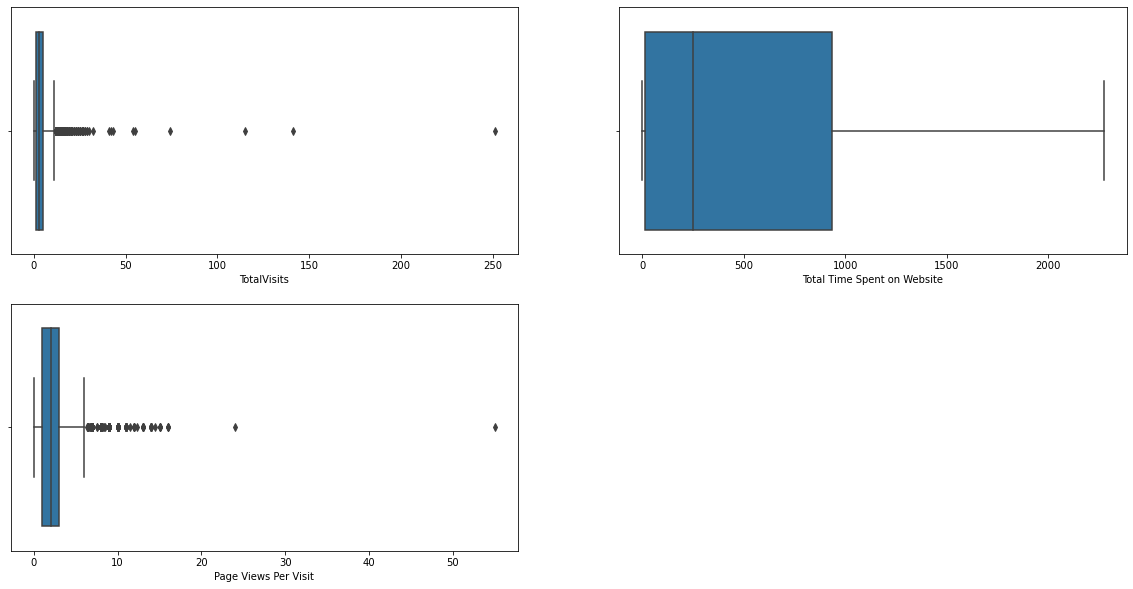

In [68]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(df['TotalVisits'])

plt.subplot(2,2,2)
sns.boxplot(df['Total Time Spent on Website'])

plt.subplot(2,2,3)
sns.boxplot(df['Page Views Per Visit'])

In [69]:
# removing outliers using the IQR

Q1 = df['TotalVisits'].quantile(0.25)
Q3 = df['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
df = df.loc[(df['TotalVisits'] >= Q1 - 1.5*IQR) & (df['TotalVisits'] <= Q3 + 1.5*IQR)]

Q1 = df['Page Views Per Visit'].quantile(0.25)
Q3 = df['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
df=df.loc[(df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Page Views Per Visit'>

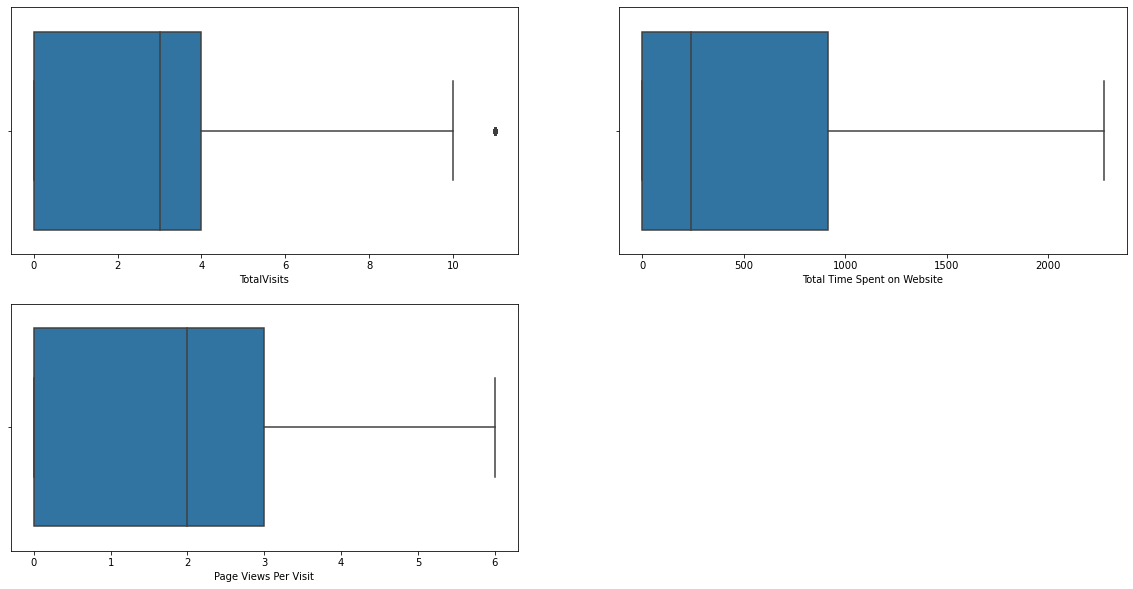

In [70]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(df['TotalVisits'])

plt.subplot(2,2,2)
sns.boxplot(df['Total Time Spent on Website'])

plt.subplot(2,2,3)
sns.boxplot(df['Page Views Per Visit'])

### Mapping binary values to 1 and 0

In [71]:
def mapping(x): # creating the mapping function
    return x.map({'Yes':1, 'No':0})

# making a list of features to be mapped to 1 and 0
features_mapping = ['Search', 'Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

df[features_mapping] = df[features_mapping].apply(mapping)

In [72]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,Interested in other courses,Unknown,Unknown,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,Ringing,Unknown,Unknown,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,Will revert after reading the email,Potential Lead,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,Ringing,Unknown,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,Will revert after reading the email,Unknown,Mumbai,0,Modified


In [73]:
# creating dummy variables for the features with no Unknown values
df = pd.get_dummies(df, columns=['Lead Origin', 'Lead Source', 'Country', 'Last Notable Activity'], drop_first=True)

In [74]:
# Creating dummmy variables for the features with 'Unknown' values and dropping the 'Unknown' created feature


# Creating dummy variables for the variable 'Last Activity'
dummy = pd.get_dummies(df['Last Activity'], prefix='Last Activity')
final_dummy = dummy.drop(['Last Activity_Unknown'], 1)
df = pd.concat([df,final_dummy], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
dummy = pd.get_dummies(df['What is your current occupation'], prefix='What is your current occupation')
final_dummy = dummy.drop(['What is your current occupation_Unknown'], 1)
df = pd.concat([df,final_dummy], axis=1)

# Creating dummy variables for the variable 'Lead Profile'
dummy = pd.get_dummies(df['Lead Profile'], prefix='Lead Profile')
final_dummy = dummy.drop(['Lead Profile_Unknown'], 1)
df = pd.concat([df,final_dummy], axis=1)

# Creating dummy variables for the variable 'Specialization'
dummy = pd.get_dummies(df['Specialization'], prefix='Specialization')
final_dummy = dummy.drop(['Specialization_Unknown'], 1)
df = pd.concat([df,final_dummy], axis=1)

# Creating dummy variables for the variable 'City'
dummy = pd.get_dummies(df['City'], prefix='City')
final_dummy = dummy.drop(['City_Unknown'], 1)
df = pd.concat([df,final_dummy], axis=1)

# Creating dummy variables for the variable 'Tags'
dummy = pd.get_dummies(df['Tags'], prefix='Tags')
final_dummy = dummy.drop(['Tags_Unknown'], 1)
df = pd.concat([df,final_dummy], axis=1)

C:\Users\prana\AppData\Local\Temp\ipykernel_36120\432803619.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  final_dummy = dummy.drop(['Last Activity_Unknown'], 1)
C:\Users\prana\AppData\Local\Temp\ipykernel_36120\432803619.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  final_dummy = dummy.drop(['What is your current occupation_Unknown'], 1)
C:\Users\prana\AppData\Local\Temp\ipykernel_36120\432803619.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  final_dummy = dummy.drop(['Lead Profile_Unknown'], 1)
C:\Users\prana\AppData\Local\Temp\ipykernel_36120\432803619.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  final_dummy = d

In [75]:
df.shape

(8679, 140)

### Dropping the features for which dummy variables were created

In [76]:
df = df.drop(['How did you hear about X Education', 'Last Activity', 'What is your current occupation', 'Lead Profile', 'Specialization', 'City', 'Tags'],axis=1)

In [77]:
df.shape

(8679, 133)

### Splitting the data into Training and Test datasets

In [78]:
from sklearn.model_selection import train_test_split as tts

In [79]:
X = df.drop(['Lead Number', 'Converted'], axis = 1)
y = df['Converted']

In [80]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.7, test_size=0.3, random_state=100)

Scaling all the features before proceeding further.

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [82]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [83]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
5182,0,0,-0.744673,-0.770602,-0.653556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8469,1,0,-0.332511,-0.532344,-0.048980,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8382,0,0,0.079651,1.685292,-0.351268,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8031,0,0,0.079651,-0.081485,0.555597,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6712,0,0,0.079651,2.942563,0.170372,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [84]:
import statsmodels.api as sm

In [85]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20) #selecting 20 feature for this model
rfe = rfe.fit(X_train, y_train)
list(zip(X_train, rfe.support_, rfe.ranking_))

C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[('Do Not Email', False, 8),
 ('Do Not Call', False, 99),
 ('TotalVisits', False, 53),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 52),
 ('Search', False, 18),
 ('Newspaper Article', False, 108),
 ('X Education Forums', False, 107),
 ('Newspaper', False, 85),
 ('Digital Advertisement', False, 97),
 ('Through Recommendations', False, 92),
 ('A free copy of Mastering The Interview', False, 87),
 ('Lead Origin_Landing Page Submission', False, 30),
 ('Lead Origin_Lead Add Form', False, 5),
 ('Lead Origin_Lead Import', False, 57),
 ('Lead Origin_Quick Add Form', False, 51),
 ('Lead Source_Direct Traffic', False, 61),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 72),
 ('Lead Source_Live Chat', False, 105),
 ('Lead Source_NC_EDM', False, 15),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 70),
 ('Lead Source_Pay per Click Ads', False, 101),
 ('Lead Source_Press_Release', False, 109),
 ('Lead Source_Referen

In [86]:
#Assigning the 20 selecting columns to a col variable.
cols = X_train.columns[rfe.support_]
cols

Index(['Lead Source_Welingak Website', 'Last Notable Activity_Modified',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given'],
      dtype='object')

In [87]:
X_train_sm = sm.add_constant(X_train[cols])
m1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6054
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1129.5
Date:                Tue, 27 Jun 2023   Deviance:                       2259.1
Time:                        21:59:38   Pearson chi2:                 1.32e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6163
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0598      0.098    -20.930      0.000      -2.253      -1.867
Lead Source_Welingak Website                             4.4034      1.032      4.267      0.000       2.381       6.426
Last Notable Activity_Modified                          -1.8127      0.137    -13.205      0.000      -2.082      -1.544
Last Activity_SMS Sent                                   2.1646      0.125     17.278      0.000       1.919       2.410
What is your current occupation_Unemployed               2.0541      0.128     16.060      0.000       1.803       2.305
What is your current occupation_Working Professional     2.0960      0.361      5.810      0.000       1.389       2.803
Tags_Already a student                                  -5.0368      1.008     -4.997      0.000      -7.013      -3.061
Tags_Closed by Horizzon                                  6.2622      0.732      8.557      0.000       4.828       7.697
Tags_Diploma holder (Not Eligible)                      -3.4811      1.040     -3.346      0.001      -5.520      -1.442
Tags_Graduation in progress                             -2.3749      0.554     -4.286      0.000      -3.461      -1.289
Tags_Interested  in full time MBA                       -2.8974      0.731     -3.961      0.000      -4.331      -1.464
Tags_Interested in other courses                        -3.2482      0.435     -7.461      0.000      -4.101      -2.395
Tags_Lost to EINS                                        5.9148      0.615      9.616      0.000       4.709       7.120
Tags_Not doing further education                       -24.8606   2.06e+04     -0.001      0.999   -4.05e+04    4.04e+04
Tags_Ringing                                            -4.6347      0.250    -18.519      0.000      -5.125      -4.144
Tags_Will revert after reading the email                 3.7352      0.205     18.263      0.000       3.334       4.136
Tags_invalid number                                    -26.5221   2.74e+04     -0.001      0.999   -5.37e+04    5.37e+04
Tags_number not provided                               -26.6704   4.57e+04     -0.001      1.000   -8.96e+04    8.95e+04
Tags_opp hangup                                         -3.1685      0.811     -3.906      0.000      -4.758      -1.579
Tags_switched off                                       -5.1518      0.604     -8.524      0.000      -6.336      -3.967
Tags_wrong number given                                -26.4406   3.66e+04     -0.001      0.999   -7.18e+04    7.18e+04
========================================================================================================================
"""

In [88]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:20]

5182    0.008873
8469    0.006780
8382    0.009562
8031    0.052002
6712    0.988385
6332    0.997364
458     0.020383
1628    0.498580
5935    0.084668
4201    0.009562
2671    0.113068
4549    0.998086
2552    0.001573
8262    0.998086
3955    0.020383
8042    0.871781
6646    0.000827
4079    0.020383
8700    0.077575
8046    0.014873
dtype: float64

In [89]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Conversion_Prob' : y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
5182,0,0.008873,5182
8469,0,0.006780,8469
8382,0,0.009562,8382
8031,0,0.052002,8031
6712,1,0.988385,6712


In [90]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
5182,0,0.008873,5182,0
8469,0,0.006780,8469,0
8382,0,0.009562,8382,0
8031,0,0.052002,8031,0
6712,1,0.988385,6712,1


In [91]:
from sklearn import metrics

In [92]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3601  155]
 [ 273 2046]]


In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9295473251028806


### Our current model is 93 percent accurate

Checking VIFs

In [94]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Closed by Horizzon,1.36
18,Tags_switched off,1.21
12,Tags_Not doing further education,1.14
9,Tags_Interested in full time MBA,1.11
8,Tags_Graduation in progress,1.11
0,Lead Source_Welingak Website,1.10
11,Tags_Lost to EINS,1.10
15,Tags_invalid number,1.07
7,Tags_Diploma holder (Not Eligible),1.06
19,Tags_wrong number given,1.04


VIF values for our features seem to be fine. Let's drop variables on the basis of p values.

In [96]:
cols = cols.drop('Tags_number not provided', 1)
cols

Index(['Lead Source_Welingak Website', 'Last Notable Activity_Modified',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off', 'Tags_wrong number given'],
      dtype='object')

## Model 2

In [97]:
X_train_sm = sm.add_constant(X_train[cols])
m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6055
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1149.7
Date:                Tue, 27 Jun 2023   Deviance:                       2299.4
Time:                        21:59:38   Pearson chi2:                 1.23e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6138
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0471      0.098    -20.956      0.000      -2.239      -1.856
Lead Source_Welingak Website                             4.4796      1.031      4.344      0.000       2.458       6.501
Last Notable Activity_Modified                          -1.7814      0.136    -13.087      0.000      -2.048      -1.515
Last Activity_SMS Sent                                   2.1107      0.123     17.146      0.000       1.869       2.352
What is your current occupation_Unemployed               1.9502      0.126     15.518      0.000       1.704       2.197
What is your current occupation_Working Professional     2.0262      0.360      5.622      0.000       1.320       2.733
Tags_Already a student                                  -4.9516      1.008     -4.913      0.000      -6.927      -2.976
Tags_Closed by Horizzon                                  6.2962      0.731      8.614      0.000       4.864       7.729
Tags_Diploma holder (Not Eligible)                      -3.3840      1.039     -3.258      0.001      -5.420      -1.348
Tags_Graduation in progress                             -2.2802      0.552     -4.131      0.000      -3.362      -1.198
Tags_Interested  in full time MBA                       -2.8112      0.731     -3.846      0.000      -4.244      -1.378
Tags_Interested in other courses                        -3.1567      0.434     -7.270      0.000      -4.008      -2.306
Tags_Lost to EINS                                        5.9036      0.614      9.623      0.000       4.701       7.106
Tags_Not doing further education                       -24.7690   2.07e+04     -0.001      0.999   -4.06e+04    4.05e+04
Tags_Ringing                                            -4.5001      0.248    -18.162      0.000      -4.986      -4.014
Tags_Will revert after reading the email                 3.7898      0.203     18.643      0.000       3.391       4.188
Tags_invalid number                                    -26.3899   2.75e+04     -0.001      0.999   -5.39e+04    5.38e+04
Tags_opp hangup                                         -3.0365      0.809     -3.755      0.000      -4.622      -1.451
Tags_switched off                                       -5.0140      0.603     -8.312      0.000      -6.196      -3.832
Tags_wrong number given                                -26.3098   3.67e+04     -0.001      0.999    -7.2e+04     7.2e+04
========================================================================================================================
"""

In [98]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [99]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Conversion_Prob' : y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
5182,0,0.009108,5182
8469,0,0.007284,8469
8382,0,0.009982,8382
8031,0,0.051757,8031
6712,1,0.988085,6712


In [100]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
5182,0,0.009108,5182,0
8469,0,0.007284,8469,0
8382,0,0.009982,8382,0
8031,0,0.051757,8031,0
6712,1,0.988085,6712,1


In [101]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3597  159]
 [ 275 2044]]


In [102]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.928559670781893


The accuracy has not dropped much. Let's check for VIF values for the features now.

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Closed by Horizzon,1.36
17,Tags_switched off,1.20
12,Tags_Not doing further education,1.14
9,Tags_Interested in full time MBA,1.11
8,Tags_Graduation in progress,1.11
11,Tags_Lost to EINS,1.10
0,Lead Source_Welingak Website,1.10
15,Tags_invalid number,1.07
7,Tags_Diploma holder (Not Eligible),1.06
18,Tags_wrong number given,1.04


Dropping features based on p values again since VIF is in the acceptable range, i.e. less than 3.

In [104]:
cols = cols.drop('Tags_Not doing further education', 1)
cols

Index(['Lead Source_Welingak Website', 'Last Notable Activity_Modified',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off', 'Tags_wrong number given'],
      dtype='object')

## Model 3

In [105]:
X_train_sm = sm.add_constant(X_train[cols])
m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6056
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1179.8
Date:                Tue, 27 Jun 2023   Deviance:                       2359.7
Time:                        21:59:39   Pearson chi2:                 1.30e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6099
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0590      0.098    -21.078      0.000      -2.250      -1.868
Lead Source_Welingak Website                             4.7454      1.032      4.597      0.000       2.722       6.768
Last Notable Activity_Modified                          -1.8719      0.134    -13.924      0.000      -2.135      -1.608
Last Activity_SMS Sent                                   2.1632      0.121     17.831      0.000       1.925       2.401
What is your current occupation_Unemployed               1.7494      0.122     14.334      0.000       1.510       1.989
What is your current occupation_Working Professional     1.9013      0.363      5.234      0.000       1.189       2.613
Tags_Already a student                                  -4.7335      1.007     -4.699      0.000      -6.708      -2.759
Tags_Closed by Horizzon                                  6.5362      0.729      8.960      0.000       5.106       7.966
Tags_Diploma holder (Not Eligible)                      -3.1761      1.040     -3.054      0.002      -5.214      -1.138
Tags_Graduation in progress                             -2.0564      0.553     -3.717      0.000      -3.141      -0.972
Tags_Interested  in full time MBA                       -2.5804      0.731     -3.532      0.000      -4.012      -1.149
Tags_Interested in other courses                        -2.9293      0.434     -6.753      0.000      -3.780      -2.079
Tags_Lost to EINS                                        6.0535      0.612      9.893      0.000       4.854       7.253
Tags_Ringing                                            -4.3288      0.246    -17.616      0.000      -4.810      -3.847
Tags_Will revert after reading the email                 4.0022      0.202     19.796      0.000       3.606       4.398
Tags_invalid number                                    -25.2075   1.66e+04     -0.002      0.999   -3.25e+04    3.24e+04
Tags_opp hangup                                         -2.8608      0.810     -3.531      0.000      -4.449      -1.273
Tags_switched off                                       -4.8454      0.602     -8.043      0.000      -6.026      -3.665
Tags_wrong number given                                -25.1250   2.21e+04     -0.001      0.999   -4.34e+04    4.34e+04
========================================================================================================================
"""

In [106]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [107]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Conversion_Prob' : y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
5182,0,0.008477,5182
8469,0,0.006418,8469
8382,0,0.009580,8382
8031,0,0.052649,8031
6712,1,0.987317,6712


In [108]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
5182,0,0.008477,5182,0
8469,0,0.006418,8469,0
8382,0,0.009580,8382,0
8031,0,0.052649,8031,0
6712,1,0.987317,6712,1


In [109]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3606  150]
 [ 283 2036]]


In [110]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.928724279835391


The accuracy has increased a little. Let's check for VIF values for the features now.

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Closed by Horizzon,1.32
16,Tags_switched off,1.18
0,Lead Source_Welingak Website,1.09
11,Tags_Lost to EINS,1.09
8,Tags_Graduation in progress,1.09
9,Tags_Interested in full time MBA,1.09
14,Tags_invalid number,1.06
7,Tags_Diploma holder (Not Eligible),1.05
17,Tags_wrong number given,1.03
15,Tags_opp hangup,1.02


Dropping features based on p values again since VIF is in the acceptable range, i.e. less than 3.

In [112]:
cols = cols.drop('Tags_invalid number', 1)
cols

Index(['Lead Source_Welingak Website', 'Last Notable Activity_Modified',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_opp hangup',
       'Tags_switched off', 'Tags_wrong number given'],
      dtype='object')

## Model 4

In [113]:
X_train_sm = sm.add_constant(X_train[cols])
m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6057
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1221.8
Date:                Tue, 27 Jun 2023   Deviance:                       2443.6
Time:                        21:59:39   Pearson chi2:                 1.16e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6045
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0336      0.096    -21.114      0.000      -2.222      -1.845
Lead Source_Welingak Website                             4.8943      1.031      4.749      0.000       2.874       6.914
Last Notable Activity_Modified                          -1.8176      0.133    -13.710      0.000      -2.077      -1.558
Last Activity_SMS Sent                                   2.0610      0.117     17.589      0.000       1.831       2.291
What is your current occupation_Unemployed               1.5495      0.118     13.080      0.000       1.317       1.782
What is your current occupation_Working Professional     1.7625      0.363      4.853      0.000       1.051       2.474
Tags_Already a student                                  -4.5725      1.007     -4.541      0.000      -6.546      -2.599
Tags_Closed by Horizzon                                  6.6162      0.728      9.083      0.000       5.189       8.044
Tags_Diploma holder (Not Eligible)                      -2.9898      1.037     -2.884      0.004      -5.022      -0.958
Tags_Graduation in progress                             -1.8744      0.550     -3.411      0.001      -2.951      -0.797
Tags_Interested  in full time MBA                       -2.4146      0.730     -3.309      0.001      -3.845      -0.984
Tags_Interested in other courses                        -2.7531      0.432     -6.374      0.000      -3.600      -1.907
Tags_Lost to EINS                                        6.0494      0.609      9.931      0.000       4.855       7.243
Tags_Ringing                                            -4.0722      0.241    -16.863      0.000      -4.546      -3.599
Tags_Will revert after reading the email                 4.1149      0.200     20.543      0.000       3.722       4.507
Tags_opp hangup                                         -2.6089      0.806     -3.238      0.001      -4.188      -1.030
Tags_switched off                                       -4.5828      0.600     -7.633      0.000      -5.760      -3.406
Tags_wrong number given                                -23.8750   1.35e+04     -0.002      0.999   -2.65e+04    2.64e+04
========================================================================================================================
"""

In [114]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [115]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Conversion_Prob' : y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
5182,0,0.008870,5182
8469,0,0.007314,8469
8382,0,0.010392,8382
8031,0,0.052221,8031
6712,1,0.986804,6712


In [116]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
5182,0,0.008870,5182,0
8469,0,0.007314,8469,0
8382,0,0.010392,8382,0
8031,0,0.052221,8031,0
6712,1,0.986804,6712,1


In [117]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3590  166]
 [ 283 2036]]


In [118]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9260905349794238


The accuracy has dropped a little, but nothing worrysome here. Let's check for VIF values for the features now.

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Closed by Horizzon,1.31
15,Tags_switched off,1.17
0,Lead Source_Welingak Website,1.09
9,Tags_Interested in full time MBA,1.09
8,Tags_Graduation in progress,1.09
11,Tags_Lost to EINS,1.08
7,Tags_Diploma holder (Not Eligible),1.05
16,Tags_wrong number given,1.03
14,Tags_opp hangup,1.02
4,What is your current occupation_Working Profes...,0.83


Dropping features based on p values again since VIF is in the acceptable range, i.e. less than 3.

In [120]:
cols = cols.drop('Tags_wrong number given', 1)
cols

Index(['Lead Source_Welingak Website', 'Last Notable Activity_Modified',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_opp hangup',
       'Tags_switched off'],
      dtype='object')

## Model 5

In [121]:
X_train_sm = sm.add_constant(X_train[cols])
m5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6058
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1242.0
Date:                Tue, 27 Jun 2023   Deviance:                       2483.9
Time:                        21:59:39   Pearson chi2:                 1.11e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6019
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0217      0.096    -21.124      0.000      -2.209      -1.834
Lead Source_Welingak Website                             4.9706      1.030      4.825      0.000       2.952       6.990
Last Notable Activity_Modified                          -1.8009      0.132    -13.660      0.000      -2.059      -1.542
Last Activity_SMS Sent                                   2.0169      0.115     17.482      0.000       1.791       2.243
What is your current occupation_Unemployed               1.4552      0.117     12.445      0.000       1.226       1.684
What is your current occupation_Working Professional     1.6967      0.363      4.669      0.000       0.984       2.409
Tags_Already a student                                  -4.4958      1.007     -4.466      0.000      -6.469      -2.523
Tags_Closed by Horizzon                                  6.6639      0.728      9.154      0.000       5.237       8.091
Tags_Diploma holder (Not Eligible)                      -2.9018      1.035     -2.802      0.005      -4.931      -0.872
Tags_Graduation in progress                             -1.7874      0.548     -3.261      0.001      -2.862      -0.713
Tags_Interested  in full time MBA                       -2.3345      0.730     -3.200      0.001      -3.764      -0.905
Tags_Interested in other courses                        -2.6685      0.431     -6.189      0.000      -3.514      -1.823
Tags_Lost to EINS                                        6.0583      0.608      9.963      0.000       4.867       7.250
Tags_Ringing                                            -3.9547      0.240    -16.499      0.000      -4.425      -3.485
Tags_Will revert after reading the email                 4.1741      0.200     20.914      0.000       3.783       4.565
Tags_opp hangup                                         -2.4933      0.804     -3.102      0.002      -4.069      -0.918
Tags_switched off                                       -4.4626      0.600     -7.443      0.000      -5.638      -3.287
========================================================================================================================
"""

In [122]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [123]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Conversion_Prob' : y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
5182,0,0.008997,5182
8469,0,0.007686,8469
8382,0,0.010759,8382
8031,0,0.052107,8031
6712,1,0.986567,6712


In [124]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
5182,0,0.008997,5182,0
8469,0,0.007686,8469,0
8382,0,0.010759,8382,0
8031,0,0.052107,8031,0
6712,1,0.986567,6712,1


In [125]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3645  111]
 [ 406 1913]]


In [126]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9148971193415638


The accuracy has dropped, but it is still more than 91 percent. Let's check for VIF values for the features now.

In [127]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Closed by Horizzon,1.30
15,Tags_switched off,1.17
0,Lead Source_Welingak Website,1.09
8,Tags_Graduation in progress,1.09
9,Tags_Interested in full time MBA,1.09
11,Tags_Lost to EINS,1.08
7,Tags_Diploma holder (Not Eligible),1.05
14,Tags_opp hangup,1.02
4,What is your current occupation_Working Profes...,0.83
10,Tags_Interested in other courses,0.33


1. We can see that now most of our P-values for almost all of our variables are equal to 'Zero' which indicates that these variables are statistically significant so we do not need to drop more feature variables.
2. Also the accuracy of our model hasn't dropped even after removing so many of the feature columns at around 91.5%

In [128]:
# correlation matrix 
plt.figure(figsize = (20,10),dpi=600)  
sns.heatmap(X_train[cols].corr(),annot = True, cmap='coolwarm')
plt.show()

plt.savefig('corr.png')

<Figure size 432x288 with 0 Axes>

### Metrics beyond simply accuracy

In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8249245364381199

In [131]:
# Let us calculate specificity
TN / float(TN+FP)

0.9704472843450479

In [132]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.029552715654952075


In [133]:
# positive predictive value 
print (TP / float(TP+FP))

0.9451581027667985


In [134]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8997778326339175


## Plotting the ROC Curve

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (RoC) curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

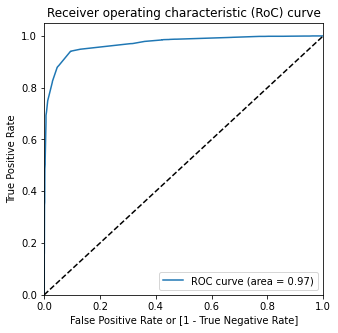

In [137]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## Finding Optimal Cutoff Point

In [138]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5182,0,0.008997,5182,0,1,0,0,0,0,0,0,0,0,0
8469,0,0.007686,8469,0,1,0,0,0,0,0,0,0,0,0
8382,0,0.010759,8382,0,1,0,0,0,0,0,0,0,0,0
8031,0,0.052107,8031,0,1,0,0,0,0,0,0,0,0,0
6712,1,0.986567,6712,1,1,1,1,1,1,1,1,1,1,1
6332,1,0.997174,6332,1,1,1,1,1,1,1,1,1,1,1
458,0,0.021404,458,0,1,0,0,0,0,0,0,0,0,0
1628,1,0.362049,1628,0,1,1,1,1,0,0,0,0,0,0
5935,0,0.086761,5935,0,1,0,0,0,0,0,0,0,0,0
4201,0,0.010759,4201,0,1,0,0,0,0,0,0,0,0,0


In [139]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381728  1.000000  0.000000
0.1   0.1  0.796708  0.970246  0.689563
0.2   0.2  0.918848  0.940492  0.905485
0.3   0.3  0.919177  0.938767  0.907082
0.4   0.4  0.923951  0.886158  0.947284
0.5   0.5  0.914897  0.824925  0.970447
0.6   0.6  0.913909  0.821906  0.970714
0.7   0.7  0.913909  0.821906  0.970714
0.8   0.8  0.913909  0.821906  0.970714
0.9   0.9  0.874403  0.681328  0.993610


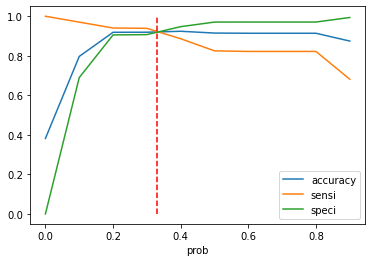

In [140]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.33, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

From the above curve, 0.33 seems to be the optimum point to take as the cutoff probability

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
5182,0,0.008997,5182,0,1,0,0,0,0,0,0,0,0,0,0
8469,0,0.007686,8469,0,1,0,0,0,0,0,0,0,0,0,0
8382,0,0.010759,8382,0,1,0,0,0,0,0,0,0,0,0,0
8031,0,0.052107,8031,0,1,0,0,0,0,0,0,0,0,0,0
6712,1,0.986567,6712,1,1,1,1,1,1,1,1,1,1,1,1


In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9191769547325103

In [143]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3407,  349],
       [ 142, 2177]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.938766709788702

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.9070820021299254

In [147]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09291799787007454


In [148]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8618368962787015


## Precision and Recall

Precision: TP / TP + FP

In [149]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8618368962787015

In [150]:
from sklearn.metrics import precision_score, recall_score

In [151]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9451581027667985

In [152]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8249245364381199

In [153]:
from sklearn.metrics import precision_recall_curve

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

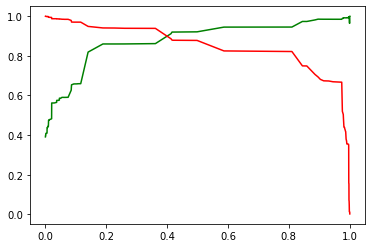

In [155]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [156]:
from sklearn.metrics import classification_report

In [157]:
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3756
           1       0.86      0.94      0.90      2319

    accuracy                           0.92      6075
   macro avg       0.91      0.92      0.92      6075
weighted avg       0.92      0.92      0.92      6075



### Making predictions on the test set

In [158]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
475,0,0,-1.156834,-0.871404,-1.258133,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2461,0,0,-1.156834,-0.871404,-1.258133,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1890,0,0,-0.332511,-0.561668,-0.048980,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6007,0,0,0.079651,-0.699124,-0.351268,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4052,0,0,0.079651,-0.596490,0.555597,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
X_test = X_test[cols]
X_test.head()

,Lead Source_Welingak Website,Last Notable Activity_Modified,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off
475,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2461,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6007,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4052,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0


In [160]:
# adding constant for statsmodel
X_test_sm = sm.add_constant(X_test)

In [161]:
# making prediction on the test set
y_test_pred = res.predict(X_test_sm)

In [162]:
y_pred = pd.DataFrame(y_test_pred)

In [163]:
y_pred.head()

,0
475,0.995896
2461,0.998376
1890,0.116944
6007,0.362049
4052,0.075556


In [164]:
y_test_df = pd.DataFrame(y_test)

In [165]:
y_test_df.head()

,Converted
475,1
2461,1
1890,0
6007,0
4052,0


In [166]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index
y_test_df.head()

,Converted,LeadID
475,1,475
2461,1,2461
1890,0,1890
6007,0,6007
4052,0,4052


In [167]:
# concatenating both the prediction and the orginal labels
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [168]:
y_pred_final.head()

,Converted,LeadID,0
475,1,475,0.995896
2461,1,2461,0.998376
1890,0,1890,0.116944
6007,0,6007,0.362049
4052,0,4052,0.075556


In [169]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final[['LeadID','Converted','Conversion_Prob']]

In [170]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
475,475,1,0.995896
2461,2461,1,0.998376
1890,1890,0,0.116944
6007,6007,0,0.362049
4052,4052,0,0.075556


In [171]:
y_pred_final['Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [172]:
# Let's check the overall accuracy.
accuracy_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted)
accuracy_score

0.9024577572964669

### Confusion matrix

In [173]:
confusion_test_set = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted)
print(confusion_test_set)

[[1420  171]
 [  83  930]]


In [174]:
TP = confusion_test_set[1,1] # true positive 
TN = confusion_test_set[0,0] # true negatives
FP = confusion_test_set[0,1] # false positives
FN = confusion_test_set[1,0] # false negatives

<b>Sensitivity</b>

In [175]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9180651530108588

<b>Specificity</b>

In [176]:
# Let us calculate specificity
TN / float(TN+FP)

0.8925204274041484

<b>False Postive Rate</b>

In [177]:
# Calculate false postive rate - predicting converion when customer does not have converted
print(FP/ float(TN+FP))

0.10747957259585167


<b>Positive Predictive Value</b>

In [178]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8446866485013624


<b>Negative Predicted Value</b>

In [179]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9447771124417831


<b>Precision</b>

In [180]:
#precision
confusion_test_set[1,1]/(confusion_test_set[0,1]+confusion_test_set[1,1])

0.8446866485013624

<b>Recall</b>

In [181]:
#recall
confusion_test_set[1,1]/(confusion_test_set[1,0]+confusion_test_set[1,1])

0.9180651530108588

<b>Classification Report</b>

In [182]:
print(classification_report(y_pred_final.Converted, y_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1591
           1       0.84      0.92      0.88      1013

    accuracy                           0.90      2604
   macro avg       0.89      0.91      0.90      2604
weighted avg       0.91      0.90      0.90      2604



<b>Precision recall curve</b>

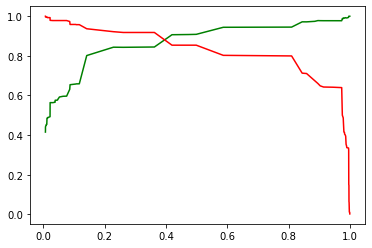

In [183]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Plotting the ROC Curve for Test Dataset

In [184]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [185]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False)

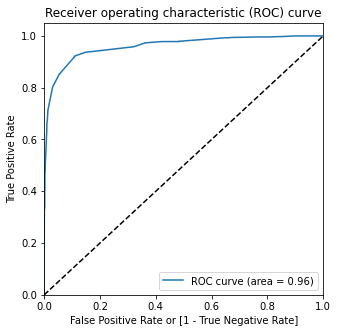

<function matplotlib.pyplot.show(close=None, block=None)>

In [186]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)
plt.show

Area under the ROC curve is around 0.96 which means our model seems to be doing well on the test set as well

In [187]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,Predicted
475,475,1,0.995896,1
2461,2461,1,0.998376,1
1890,1890,0,0.116944,0
6007,6007,0,0.362049,1
4052,4052,0,0.075556,0


In [188]:
y_pred_final['Lead Score'] = y_pred_final['Conversion_Prob']*100
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,Predicted,Lead Score
475,475,1,0.995896,1,99.589646
2461,2461,1,0.998376,1,99.837567
1890,1890,0,0.116944,0,11.694372
6007,6007,0,0.362049,1,36.204895
4052,4052,0,0.075556,0,7.555647


In [189]:
y_pred_final = pd.merge(df[['Lead Number']], y_pred_final,how='inner',left_index=True, right_index=True)

In [190]:
y_pred_final.head()  # test dataset with all the Lead Score values

,Lead Number,LeadID,Converted,Conversion_Prob,Predicted,Lead Score
0,660737,0,0,0.006459,0,0.645909
3,660719,3,0,0.001793,0,0.179306
11,660570,11,1,0.995896,1,99.589646
14,660553,14,0,0.362049,1,36.204895
18,660522,18,1,0.362049,1,36.204895


In [191]:
y_train_pred_df = y_train_pred_final[['Converted', 'Conversion_Prob', 'LeadID','Predicted']]
y_train_pred_df.head()

,Converted,Conversion_Prob,LeadID,Predicted
5182,0,0.008997,5182,0
8469,0,0.007686,8469,0
8382,0,0.010759,8382,0
8031,0,0.052107,8031,0
6712,1,0.986567,6712,1


In [192]:
y_train_pred_df = pd.merge(df[['Lead Number']], y_train_pred_df,how='inner',left_index=True, right_index=True)
y_train_pred_df.head()

,Lead Number,Converted,Conversion_Prob,LeadID,Predicted
1,660728,0,0.010759,1,0
2,660727,1,0.895895,2,1
4,660681,1,0.858973,4,1
5,660680,0,0.021404,5,0
6,660673,1,0.858973,6,1


In [193]:
y_train_pred_df['Lead Score'] = y_train_pred_df['Conversion_Prob']*100
y_train_pred_df.head()     # train dataset with all the Lead Score values

,Lead Number,Converted,Conversion_Prob,LeadID,Predicted,Lead Score
1,660728,0,0.010759,1,0,1.075914
2,660727,1,0.895895,2,1,89.589534
4,660681,1,0.858973,4,1,85.897316
5,660680,0,0.021404,5,0,2.140382
6,660673,1,0.858973,6,1,85.897316


Final dataframe with all the Lead Scores

In [194]:
final_df_lead_score = pd.concat([y_train_pred_df,y_pred_final],axis=0)
final_df_lead_score.head()

,Lead Number,Converted,Conversion_Prob,LeadID,Predicted,Lead Score
1,660728,0,0.010759,1,0,1.075914
2,660727,1,0.895895,2,1,89.589534
4,660681,1,0.858973,4,1,85.897316
5,660680,0,0.021404,5,0,2.140382
6,660673,1,0.858973,6,1,85.897316


In [195]:
final_df_lead_score = final_df_lead_score.set_index('LeadID')

final_df_lead_score = final_df_lead_score[['Lead Number','Converted','Conversion_Prob','Predicted','Lead Score']]

Final dataframe with the Lead Scores for all the LeadID

In [196]:
final_df_lead_score.head()  # final dataframe with all the Lead Scores

,Lead Number,Converted,Conversion_Prob,Predicted,Lead Score
LeadID,,,,,
1,660728,0,0.010759,0,1.075914
2,660727,1,0.895895,1,89.589534
4,660681,1,0.858973,1,85.897316
5,660680,0,0.021404,0,2.140382
6,660673,1,0.858973,1,85.897316


In [197]:
final_df_lead_score.shape

(8679, 5)

Determining Feature Importance of our final model

In [198]:
# coefficients of our final model 

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                            4.97
Last Notable Activity_Modified                         -1.80
Last Activity_SMS Sent                                  2.02
What is your current occupation_Unemployed              1.46
What is your current occupation_Working Professional    1.70
Tags_Already a student                                 -4.50
Tags_Closed by Horizzon                                 6.66
Tags_Diploma holder (Not Eligible)                     -2.90
Tags_Graduation in progress                            -1.79
Tags_Interested  in full time MBA                      -2.33
Tags_Interested in other courses                       -2.67
Tags_Lost to EINS                                       6.06
Tags_Ringing                                           -3.95
Tags_Will revert after reading the email                4.17
Tags_opp hangup                                        -2.49
Tags_switched off                                      -4.46
dtype: float64

In [199]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                            74.59
Last Notable Activity_Modified                         -27.02
Last Activity_SMS Sent                                  30.27
What is your current occupation_Unemployed              21.84
What is your current occupation_Working Professional    25.46
Tags_Already a student                                 -67.47
Tags_Closed by Horizzon                                100.00
Tags_Diploma holder (Not Eligible)                     -43.55
Tags_Graduation in progress                            -26.82
Tags_Interested  in full time MBA                      -35.03
Tags_Interested in other courses                       -40.04
Tags_Lost to EINS                                       90.91
Tags_Ringing                                           -59.35
Tags_Will revert after reading the email                62.64
Tags_opp hangup                                        -37.42
Tags_switched off                                      -66.97
dtype: f

In [200]:
# Sorting the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')

In [201]:
feature_importance_df = pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False)
feature_importance_df = feature_importance_df.rename(columns={'index':'Variables', 0:'Relative coeffient value'})
feature_importance_df = feature_importance_df.reset_index(drop=True)
feature_importance_df.head(5)

,Variables,Relative coeffient value
0,Tags_Closed by Horizzon,100.00
1,Tags_Lost to EINS,90.91
2,Lead Source_Welingak Website,74.59
3,Tags_Will revert after reading the email,62.64
4,Last Activity_SMS Sent,30.27


The top 5 variables are:<br>
1. Tags_Closed by Horizzon<br>
2. Tags_Lost to EINS<br>
3. Lead Source_Welingak Website<br>
4. Tags_Will revert after reading the email<br>
5. Last Activity_SMS Sent